In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

In [20]:
nba_adv = pd.read_csv('NBA2021.csv',encoding='latin')
nba_adv.head()

,Rk,Player,ID,Pos,Age,Tm,G,MP,PER,TS%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Precious Achiuwa,achiupr01,PF,21,MIA,61,737,14.2,0.550,...,13.5,19.5,0.3,1.0,1.3,0.085,-3.6,-0.5,-4.1,-0.4
1,2,Jaylen Adams,adamsja01,PG,24,MIL,7,18,-6.5,0.125,...,0.0,18.6,-0.1,0.0,-0.1,-0.252,-15.1,-4.6,-19.8,-0.1
2,3,Steven Adams,adamsst01,C,27,NOP,58,1605,15.1,0.596,...,17.5,11.7,2.3,1.7,4.0,0.119,-0.4,0.1,-0.3,0.7
3,4,Bam Adebayo,adebaba01,C,23,MIA,64,2143,22.7,0.626,...,15.0,23.7,5.6,3.2,8.8,0.197,2.9,2.0,4.9,3.7
4,5,LaMarcus Aldridge,aldrila01,C,35,TOT,26,674,15.7,0.556,...,7.9,22.2,0.5,0.6,1.1,0.080,-0.2,-0.2,-0.3,0.3


In [21]:
nba_raw = pd.read_csv('NBA2021Raw.csv',encoding='latin')
nba_raw.head()

,Rk,Player,ID,Pos,Age,Tm,G,GS,MP,FG,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,achiupr01,PF,21,MIA,61,4,737,124,...,0.509,73,135,208,29,20,28,43,91,304
1,2,Jaylen Adams,adamsja01,PG,24,MIL,7,0,18,1,...,NaN,0,3,3,2,0,0,0,1,2
2,3,Steven Adams,adamsst01,C,27,NOP,58,58,1605,189,...,0.444,213,301,514,111,54,38,78,113,438
3,4,Bam Adebayo,adebaba01,C,23,MIA,64,64,2143,456,...,0.799,142,431,573,346,75,66,169,145,1197
4,5,LaMarcus Aldridge,aldrila01,C,35,TOT,26,23,674,140,...,0.872,19,99,118,49,11,29,27,47,352


In [22]:
nba_raw.columns

Index(['Rk', 'Player', 'ID', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [23]:
print(nba_adv.shape , nba_raw.shape)

(705, 28) (705, 31)


In [24]:
set(nba.columns)&set(nba_raw.columns)

{'2P',
 '2P%',
 '2PA',
 '3P',
 '3P%',
 '3PA',
 'AST',
 'Age',
 'BLK',
 'DRB',
 'FG',
 'FG%',
 'FGA',
 'FT',
 'FT%',
 'FTA',
 'G',
 'GS',
 'ID',
 'MP',
 'ORB',
 'PF',
 'PTS',
 'Player',
 'Pos',
 'Rk',
 'STL',
 'TOV',
 'TRB',
 'Tm',
 'eFG%'}

In [29]:
nba_advD = nba_adv.drop(['Age', 'G', 'ID', 'MP', 'Pos', 'Rk',],axis=1)

In [30]:
nba = nba_raw.merge(nba_advD,on=['Player','Tm'])

In [31]:
nba.shape

(705, 51)

In [32]:
nba.columns

Index(['Rk', 'Player', 'ID', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM',
       'BPM', 'VORP'],
      dtype='object')

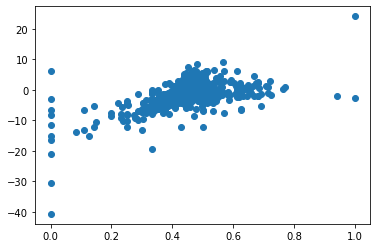

In [35]:
plt.scatter(x='FG%',y='OBPM',data=nba)
plt.show()

In [36]:
nba[nba['FG%']==0]['FGA']

49     2
82     1
83     3
127    1
264    4
406    1
507    1
516    1
654    3
679    3
Name: FGA, dtype: int64

Some players never took the shot 

In [37]:
nba[nba['FG%'].isna()]

,Rk,Player,ID,Pos,Age,Tm,G,GS,MP,FG,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
126,100,Gary Clark,clarkga01,SF,26,DEN,2,0,4,0,...,0.0,0.037,-4.400,-2.0,-6.5,0.0,NaN,NaN,NaN,NaN
250,195,Ashton Hagans,haganas01,PG,21,MIN,2,0,4,0,...,0.0,0.000,-0.353,-13.7,-7.4,-21.1,0.0,NaN,NaN,NaN


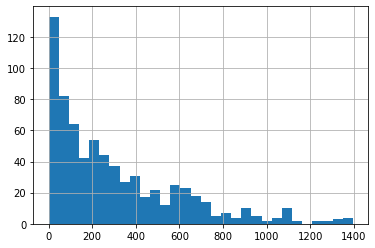

In [39]:
nba['FGA'].hist(bins=30)
plt.show()

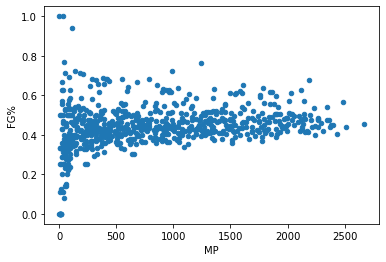

In [41]:
nba.plot.scatter(x='MP',y='FG%')
plt.show()

Best and worst FG% occur among players with very little playing time.

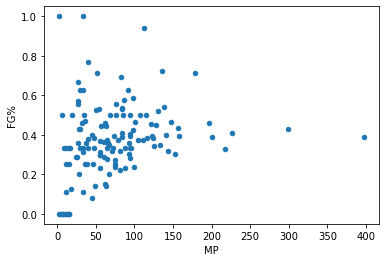

In [45]:
nba[nba['FGA']<50].plot.scatter(x='MP',y='FG%')
plt.show()

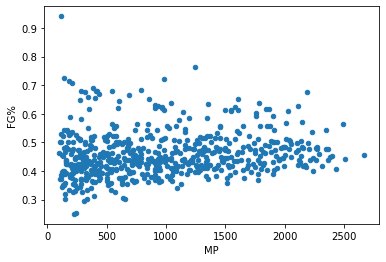

In [44]:
nba[nba['MP']>=100].plot.scatter(x='MP',y='FG%')
plt.show()